In [105]:
import pandas as pd
#import spacy
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from neo4j import GraphDatabase
import re
from collections import Counter
from nltk.tokenize import word_tokenize

punctuations = string.punctuation
stopwords = stopwords.words('english')

In [30]:
# input data and getting hashtags/mentions
data2 = pd.read_csv("ChatGPT.csv")
data2['Hashtags'] = data2['Tweet'].astype(str).apply(lambda x:re.findall(r'#\w+', x))
data2['Mentions'] = data2['Tweet'].astype(str).apply(lambda x:re.findall(r'@\w+', x))
data2['Tweet'] = data2['Tweet'].astype(str)

In [344]:
nlp = spacy.load("en_core_web_sm")

In [345]:
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

def item_removal(text):
    text = re.sub('<.*?>','',text)
    text = re.sub(r'@\w+','',text)
    text = re.sub('\n','',text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-—_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    text = re.sub(r'[0-9]+','',text)
    text = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_—`{|}~]*','',text)
    text = re.sub(emoj, '', text)
    return text

In [346]:
# remove emojis, symbols, mentions, and convert to a nlp tokens form
def cleanup_text(docs, logging=False):
    texts = []
    counter = 1
    for doc in docs:
        doc = item_removal(doc)
        if counter % 1000 == 0 and logging:
            print("Processed %d out of %d documents." % (counter, len(docs)))
        counter += 1
        doc = nlp(doc, disable=['parser', 'ner'])
        tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
        tokens = [tok for tok in tokens if tok not in stopwords and tok not in punctuations]
        tokens = ' '.join(tokens)
        texts.append(tokens)
    return pd.Series(texts)

In [347]:
#clean up tweets text
cleaned_data = cleanup_text(data2['Tweet'], True)
data2['clean'] = cleaned_data

Processed 1000 out of 478347 documents.
Processed 2000 out of 478347 documents.
Processed 3000 out of 478347 documents.
Processed 4000 out of 478347 documents.
Processed 5000 out of 478347 documents.
Processed 6000 out of 478347 documents.
Processed 7000 out of 478347 documents.
Processed 8000 out of 478347 documents.
Processed 9000 out of 478347 documents.
Processed 10000 out of 478347 documents.
Processed 11000 out of 478347 documents.
Processed 12000 out of 478347 documents.
Processed 13000 out of 478347 documents.
Processed 14000 out of 478347 documents.
Processed 15000 out of 478347 documents.
Processed 16000 out of 478347 documents.
Processed 17000 out of 478347 documents.
Processed 18000 out of 478347 documents.
Processed 19000 out of 478347 documents.
Processed 20000 out of 478347 documents.
Processed 21000 out of 478347 documents.
Processed 22000 out of 478347 documents.
Processed 23000 out of 478347 documents.
Processed 24000 out of 478347 documents.
Processed 25000 out of 47

Processed 199000 out of 478347 documents.
Processed 200000 out of 478347 documents.
Processed 201000 out of 478347 documents.
Processed 202000 out of 478347 documents.
Processed 203000 out of 478347 documents.
Processed 204000 out of 478347 documents.
Processed 205000 out of 478347 documents.
Processed 206000 out of 478347 documents.
Processed 207000 out of 478347 documents.
Processed 208000 out of 478347 documents.
Processed 209000 out of 478347 documents.
Processed 210000 out of 478347 documents.
Processed 211000 out of 478347 documents.
Processed 212000 out of 478347 documents.
Processed 213000 out of 478347 documents.
Processed 214000 out of 478347 documents.
Processed 215000 out of 478347 documents.
Processed 216000 out of 478347 documents.
Processed 217000 out of 478347 documents.
Processed 218000 out of 478347 documents.
Processed 219000 out of 478347 documents.
Processed 220000 out of 478347 documents.
Processed 221000 out of 478347 documents.
Processed 222000 out of 478347 doc

Processed 395000 out of 478347 documents.
Processed 396000 out of 478347 documents.
Processed 397000 out of 478347 documents.
Processed 398000 out of 478347 documents.
Processed 399000 out of 478347 documents.
Processed 400000 out of 478347 documents.
Processed 401000 out of 478347 documents.
Processed 402000 out of 478347 documents.
Processed 403000 out of 478347 documents.
Processed 404000 out of 478347 documents.
Processed 405000 out of 478347 documents.
Processed 406000 out of 478347 documents.
Processed 407000 out of 478347 documents.
Processed 408000 out of 478347 documents.
Processed 409000 out of 478347 documents.
Processed 410000 out of 478347 documents.
Processed 411000 out of 478347 documents.
Processed 412000 out of 478347 documents.
Processed 413000 out of 478347 documents.
Processed 414000 out of 478347 documents.
Processed 415000 out of 478347 documents.
Processed 416000 out of 478347 documents.
Processed 417000 out of 478347 documents.
Processed 418000 out of 478347 doc

In [100]:
data2['clean']

0                          chatgpt movie something show end
1         workshop description workshop learn use chatgp...
2         new post ainewsdropchatgpt doctor sorta artifi...
3                  openai ’s gpt got supercharge ai chatgpt
4         classical art struggle change fact disappearin...
                                ...                        
478342    new chatgpt insaneprompt article seo optimize ...
478343    chatgpt first look thing incredible education ...
478344    ok new chatgpt basically generate aiart prompt...
478345    chatgpt research early stage gpt optimise chat...
478346    ai models set become search engine future atm ...
Name: clean, Length: 478266, dtype: object

In [136]:
#from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [351]:

vec = TfidfVectorizer(stop_words="english")
vec.fit(cleaned_data.values)
features = vec.transform(cleaned_data.values)

#taking an arbitary value say 5, to get 5 cluster values
kmeans = KMeans(n_clusters = 5,init ='k-means++', max_iter=300, random_state=0,verbose=1)
y_kmeans =  kmeans.fit_predict(features)
b = y_kmeans

Initialization complete
Iteration 0, inertia 922431.4235408837
Iteration 1, inertia 470777.03194003965
Iteration 2, inertia 470263.2820835875
Iteration 3, inertia 470037.7435947689
Iteration 4, inertia 469813.64844062837
Iteration 5, inertia 469728.25992933934
Iteration 6, inertia 469649.87787473726
Iteration 7, inertia 469591.24754657625
Iteration 8, inertia 469517.06873874617
Iteration 9, inertia 469422.4160919697
Iteration 10, inertia 469336.8626670958
Iteration 11, inertia 469292.2430948884
Iteration 12, inertia 469255.1600927451
Iteration 13, inertia 469252.2734829022
Iteration 14, inertia 469251.4432711577
Iteration 15, inertia 469251.01816674124
Iteration 16, inertia 469250.6619559519
Iteration 17, inertia 469250.3995548638
Iteration 18, inertia 469250.295609195
Iteration 19, inertia 469250.26539808826
Iteration 20, inertia 469250.25360515533
Iteration 21, inertia 469250.2419305421
Iteration 22, inertia 469250.2372830468
Iteration 23, inertia 469250.2253923303
Iteration 24, iner

Iteration 15, inertia 468814.210436456
Iteration 16, inertia 468814.15787733364
Iteration 17, inertia 468814.1307274349
Iteration 18, inertia 468814.1134612877
Iteration 19, inertia 468814.10439809295
Iteration 20, inertia 468814.09768091637
Iteration 21, inertia 468814.09429883177
Iteration 22, inertia 468814.0911128165
Iteration 23, inertia 468814.0879069266
Iteration 24, inertia 468814.0858426905
Iteration 25, inertia 468814.08461855806
Iteration 26, inertia 468814.08319406654
Iteration 27, inertia 468814.08288958186
Iteration 28, inertia 468814.0824769195
Iteration 29, inertia 468814.0821545736
Converged at iteration 29: center shift 1.0455918819670148e-10 within tolerance 3.3213141656571457e-10.
Initialization complete
Iteration 0, inertia 926730.2970180671
Iteration 1, inertia 470977.97359172633
Iteration 2, inertia 470589.8270669254
Iteration 3, inertia 470406.41962470073
Iteration 4, inertia 470084.0565433843
Iteration 5, inertia 469886.7931678425
Iteration 6, inertia 469830.14

Iteration 6, inertia 469077.257202464
Iteration 7, inertia 469045.5763487568
Iteration 8, inertia 469001.250714649
Iteration 9, inertia 468934.233944163
Iteration 10, inertia 468802.9442265594
Iteration 11, inertia 468609.1149061755
Iteration 12, inertia 468472.85032312194
Iteration 13, inertia 468386.54394363327
Iteration 14, inertia 468360.2662196441
Iteration 15, inertia 468357.7221824439
Iteration 16, inertia 468356.86607506627
Iteration 17, inertia 468356.3432233958
Iteration 18, inertia 468355.91283048486
Iteration 19, inertia 468355.63098758593
Iteration 20, inertia 468355.42156597564
Iteration 21, inertia 468355.30072309426
Iteration 22, inertia 468355.23476072267
Iteration 23, inertia 468355.19663270924
Iteration 24, inertia 468355.16136111756
Iteration 25, inertia 468355.12385441037
Iteration 26, inertia 468355.0986563168
Iteration 27, inertia 468355.08205702784
Iteration 28, inertia 468355.071094722
Iteration 29, inertia 468355.06587702374
Iteration 30, inertia 468355.060344

In [125]:
#most common word for the next analysis
word_count = Counter(("".join(data2['clean']).split(' ')))
word_count.most_common(20)

[('chatgpt', 373400),
 ('ai', 179354),
 ('use', 60019),
 ('openai', 42812),
 ('gpt', 41375),
 ('like', 31657),
 ('write', 31617),
 ('make', 28570),
 ('get', 28201),
 ('new', 26196),
 ('artificialintelligence', 25499),
 ('amp', 25323),
 ('ask', 21899),
 ('technology', 21547),
 ('google', 20165),
 ('tool', 19927),
 ('chatbot', 19560),
 ('create', 18230),
 ('go', 18091),
 ('know', 17186)]

<AxesSubplot:xlabel='day'>

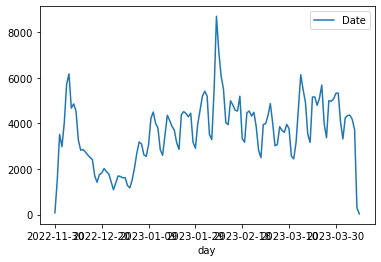

In [110]:
#data distribution in time
data2['day'] = data2['Date'].str[:10]
data2.groupby('day').count().plot(y = 'Date', use_index = True)

In [112]:
#overall sentimant analysis 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_score(text):
    dict_res = sid.polarity_scores(text)
    return dict_res["compound"]

data2['score'] = data2['clean'].apply(lambda x: get_score(x))

data2['sentiment']=np.where(data2['score']>0,1,0)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<AxesSubplot:xlabel='day', ylabel='negative'>

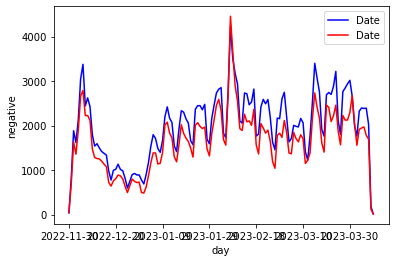

In [268]:
#graph for two frequency in positive / negative tweets
ax = data2[data2['sentiment'] == 1].groupby('day').count().plot(y = 'Date', use_index = True, color = 'blue', ylabel='positive')
data2[data2['sentiment'] == 0].groupby('day').count().plot(ax = ax, y = 'Date', use_index = True, color = 'red', ylabel='negative')

<AxesSubplot:xlabel='day'>

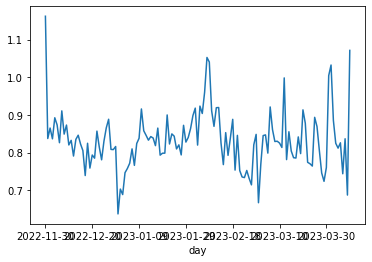

In [269]:
#graph for change in ratio between positive and negative tweets
ratio = data2[data2['sentiment'] == 0].groupby('day').count()['Date'] / data2[data2['sentiment'] == 1].groupby('day').count()['Date']
ratio.plot()

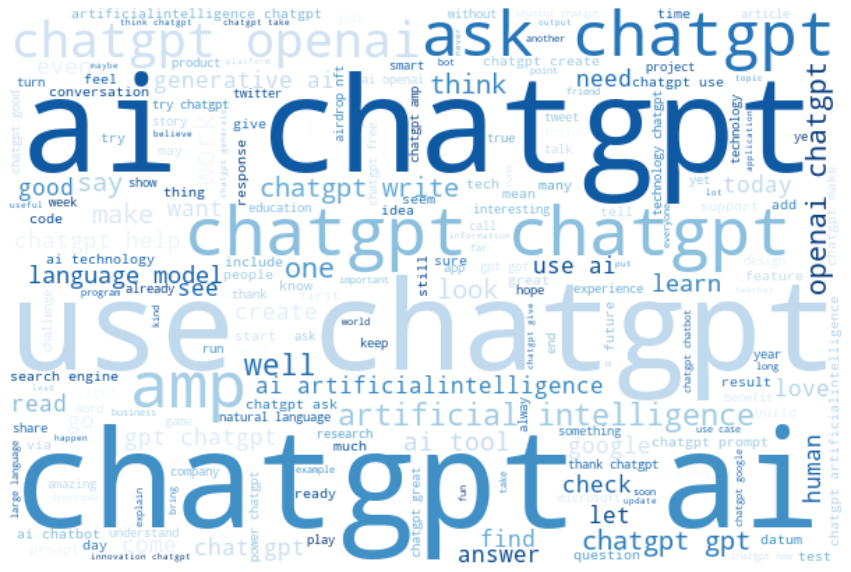

In [180]:
#wordcloud for positive sentiment 
wordcloud3 = WordCloud( background_color='white',colormap="Blues",
                        width=600,
                        height=400).generate(" ".join(data2[data2['sentiment']==1]['clean']))
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud3, interpolation="bilinear")
plt.axis('off')
plt.show()

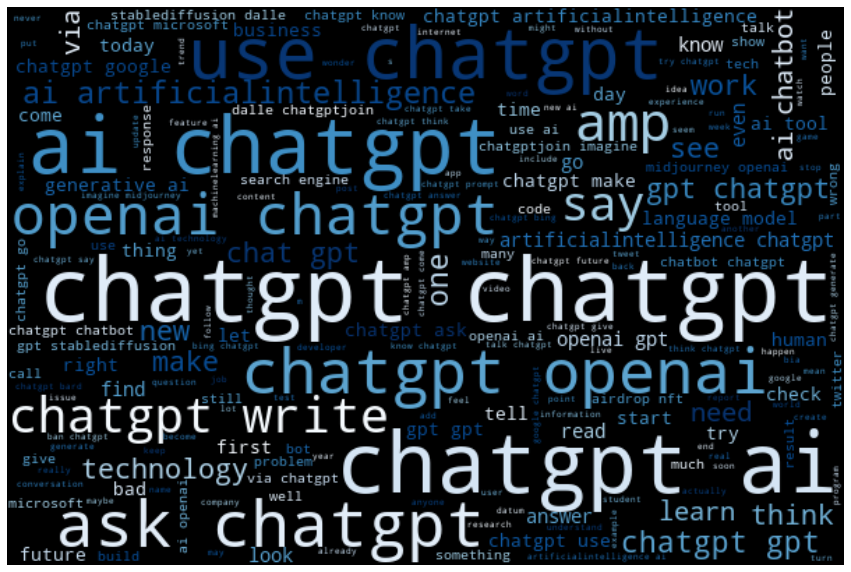

In [181]:
#wordcloud for negative sentiment
wordcloud3 = WordCloud( background_color='black',colormap="Blues",
                        width=600,
                        height=400).generate(" ".join(data2[data2['sentiment']==0]['clean']))
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud3, interpolation="bilinear")
plt.axis('off')
plt.show()

In [35]:
#neo4j
uri = "bolt://localhost:7666"
username = "neo4j"
password = "password"

def create_neo4j_session(uri, username, password):
    try:
        driver = GraphDatabase.driver(uri, auth=(username, password))
        session = driver.session()
        return session
    except Exception as e:
        print(f"Failed to create Neo4j session: {e}")
        return None

In [36]:
session = create_neo4j_session(uri, username, password)

# Execute a sample query
query = "MATCH (n) DETACH DELETE n"
result = session.run(query)

# Close the session and driver
session.close()

In [39]:
#insert constraint
session = create_neo4j_session(uri, username, password)

query = """
CREATE CONSTRAINT user_name
FOR (u:User) REQUIRE u.name IS UNIQUE"""
result = session.run(query)
query = """
CREATE CONSTRAINT ht_name
FOR (u:Hashtag) REQUIRE u.name IS UNIQUE"""
result = session.run(query)
query = """
CREATE CONSTRAINT tweet_id
FOR (u:Tweet) REQUIRE u.id IS UNIQUE"""
result = session.run(query)

# Close the session and driver
session.close()

ClientError: {code: Neo.ClientError.Schema.ConstraintAlreadyExists} {message: Constraint already exists: Constraint( id=10, name='user_name', type='UNIQUENESS', schema=(:User {name}), ownedIndex=9 )}

In [274]:
#csv for neo4j (I put it into neo4j manually)
data2['index'] = data2.index
data2[['index', 'User', 'UserVerified', 'UserFollowers', 'UserFriends', 'Retweets', 'Likes', 'Hashtags', 'Mentions', 'Date']].to_csv("only_relation.csv")

In [67]:
#insert Users, Tweets, Hashtags into neo4j

session = create_neo4j_session(uri, username, password)

# Execute a sample query
query = """LOAD CSV WITH HEADERS FROM 'file:///only_relation.csv' AS row
Merge (u:User {name: row.User})
SET u.follower = row.UserFollowers
SET u.friend = row.UserFriends
SET u.verified = row.UserVerified
Merge (t:Tweet {id: row.index})
SET t.date = row.Date
SET t.like = row.Likes
SET t.retweet = row.Retweets
Merge (u)-[:Created]->(t)
"""

result = session.run(query)

query = """LOAD CSV WITH HEADERS FROM 'file:///only_relation.csv' AS row
unwind split(substring(row.Hashtags, 1, size(row.Hashtags)-2), ", ") as ht
match (t:Tweet{id:row.index})
merge (h:Hashtag{name:substring(toLower(ht), 2, size(ht)-3)})
merge (t)-[:HasTag]->(h)
"""

result = session.run(query)

query = """LOAD CSV WITH HEADERS FROM 'file:///only_relation.csv' AS row
unwind split(substring(row.Mentions, 1, size(row.Mentions)-2), ", ") as ht
match (t:Tweet{id:row.index})
merge (h:User{name:substring(toLower(ht), 2, size(ht)-3)})
merge (t)-[:Mentions]->(h)
"""

result = session.run(query)

# Close the session and driver
session.close()

In [82]:
#remove unexpected occurance
session = create_neo4j_session(uri, username, password)

query = "match (n) where n.name = '' DETACH DELETE n"
result = session.run(query)

# Close the session and driver
session.close()

In [83]:
#pagerank centrality analysis on User
session = create_neo4j_session(uri, username, password)

pagerank_query = """CALL gds.graph.project(
  'myGraph',
  ['User','Tweet', 'Hashtag'],
  ['Created', 'HasTag', 'Mentions']
)
"""
result = session.run(pagerank_query)

pagerank_query = """CALL gds.pageRank.stream('myGraph')
YIELD nodeId, score
where labels(gds.util.asNode(nodeId)) = ["User"]
RETURN gds.util.asNode(nodeId).name AS name, score
ORDER BY score DESC, name ASC limit 10"""
result = session.run(pagerank_query)

# drop_my_graph_query = """CALL gds.graph.drop('myGraph')"""
# result2 = session.run(pagerank_query)

for record in result:
    print(record)
    
# Close the session and driver
session.close()

<Record name="openai'" score=30.501658756744966>
<Record name="elonmusk'" score=8.330247070290824>
<Record name="sama'" score=4.007267502289377>
<Record name="microsoft'" score=3.25997546235015>
<Record name="youtube'" score=2.8313487762237766>
<Record name="google'" score=2.713989530261406>
<Record name="bing'" score=1.6769625343406593>
<Record name="datachaz'" score=1.2723364583333334>
<Record name="forbes'" score=0.9285418154761905>
<Record name="openaicommunity'" score=0.8241916666666667>


In [84]:
#eigenvector centrality analysis on User
session = create_neo4j_session(uri, username, password)

pagerank_query = """CALL gds.graph.project(
  'myGraph2',
  ['User','Tweet', 'Hashtag'],
  ['Created', 'HasTag', 'Mentions']
)
"""
result = session.run(pagerank_query)

pagerank_query = """CALL gds.eigenvector.stream('myGraph2')
YIELD nodeId, score
where labels(gds.util.asNode(nodeId)) = ["User"]
RETURN gds.util.asNode(nodeId).name AS name, score
ORDER BY score DESC, name ASC limit 10"""
result = session.run(pagerank_query)

# drop_my_graph_query = """CALL gds.graph.drop('myGraph')"""
# result2 = session.run(pagerank_query)

for record in result:
    print(record)
    
# Close the session and driver
session.close()

<Record name="openai'" score=0.04319738607035691>
<Record name="elonmusk'" score=0.011633736641214035>
<Record name="microsoft'" score=0.006198304564292113>
<Record name="sama'" score=0.005816870734332682>
<Record name="youtube'" score=0.004958644616923958>
<Record name="google'" score=0.004672569244454385>
<Record name="bing'" score=0.0027654000946572234>
<Record name="betamoroney'" score=0.0020025324347383577>
<Record name="spirosmargaris'" score=0.0020025324347383577>
<Record name="drjdrooghaag'" score=0.0016210986047789256>


In [118]:
#eigenvector centrality analysis on Hashtag
session = create_neo4j_session(uri, username, password)

result = session.run(pagerank_query)

pagerank_query = """CALL gds.eigenvector.stream('myGraph2')
YIELD nodeId, score
RETURN gds.util.asNode(nodeId).name AS name, score
ORDER BY score DESC, name ASC limit 20"""
result = session.run(pagerank_query)

# drop_my_graph_query = """CALL gds.graph.drop('myGraph')"""
# result2 = session.run(pagerank_query)

for record in result:
    print(record)
    
# Close the session and driver
session.close()

<Record name="chatgpt'" score=0.9532985043536074>
<Record name="ai'" score=0.25775391542253695>
<Record name="openai'" score=0.09802849912702526>
<Record name="artificialintelligence'" score=0.06303194522824754>
<Record name="openai'" score=0.04319738607035691>
<Record name="machinelearning'" score=0.02412569457238553>
<Record name="gpt4'" score=0.024030336114895672>
<Record name="technology'" score=0.02393497765740582>
<Record name="google'" score=0.022409242337568098>
<Record name="microsoft'" score=0.020502073187770923>
<Record name="chatbot'" score=0.018499545580483886>
<Record name="gpt'" score=0.017736677920565012>
<Record name="midjourney'" score=0.017164527175625856>
<Record name="nft'" score=0.01630630105821713>
<Record name="tech'" score=0.01621094260072727>
<Record name="web3'" score=0.01582950877076783>
<Record name="generativeai'" score=0.015543433398298254>
<Record name="gpt3'" score=0.01325483041854164>
<Record name="bard'" score=0.012682679673602483>
<Record name="crypt

In [7]:
#cassandra setup
from cassandra.cluster import Cluster

cluster = Cluster(['localhost'])
session = cluster.connect()

keyspace_name = "tweets"
table_name = "a"

create_keyspace_query = f"CREATE KEYSPACE IF NOT EXISTS {keyspace_name} WITH REPLICATION = {{'class': 'SimpleStrategy', 'replication_factor': 1}}"
session.execute(create_keyspace_query)

session.set_keyspace(keyspace_name)

create_table_query = f"CREATE TABLE IF NOT EXISTS {keyspace_name}.{table_name} (id text, date timestamp, tweet text, hashtags list<text>, primary key((date), id))"
session.execute(create_table_query)

data2['Hashtags'] = data2['Hashtags'].apply(lambda x: eval(x))
data2['id'] = data2['Unnamed: 0.1'].astype(str)
df = data2[data2['day'].apply(lambda x: x[4] == '-' and x[7] == '-')]

In [ ]:
#insert data into cassandra
insert_query = f"INSERT INTO {keyspace_name}.{table_name} (id, date, tweet, hashtags) VALUES (%s, %s, %s, %s)"
for row in df[['id', 'day', 'Tweet', 'Hashtags']].values.tolist():
    #print(row)
    session.execute(insert_query, row)

In [253]:
tags = ['#ChatGPT', '#AI', '#openai', '#artificialintelligence', '#machinelearning']

In [262]:
#find the occurance of tags for each month
counts = []
for i in [1,2,3,4]:
    count = []
    for w in tags:
        insert_query = f"SELECT count(*) FROM {table_name} WHERE hashtags CONTAINS %s and date > '2023-0{i}-01' and date < '2023-0{i+1}-01' Allow filtering"
        result = session.execute(insert_query,[w])
        for row in result:
            count.append(row[0])
    counts.append(count)

<AxesSubplot:xlabel='month'>

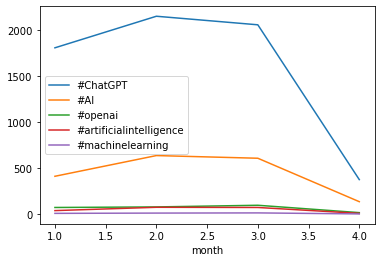

In [282]:
# plot for change in frequency of tags over months
df = pd.DataFrame(counts, columns = tags)
df['month'] = df.index +1
df.plot(x = 'month')

In [ ]:
#import aspect based sentiment analysis
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "yangheng/deberta-v3-base-absa-v1.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

In [ ]:
#only keep tweets for a certain like count
#my computer keeps notworking when dealing with tensorflow and pipeline so this is the alternative method
df = data2[data2['Likes'].apply(lambda x:(isinstance(x, int)))]
df1 = df[df['Likes'] > 20]
df1.shape

In [ ]:
#research on aspects we get from the common word and centrality analysis
aspects = ['chatgpt', 'ai', 'openai', 'google', 'technology']

result = []
for text in df1['clean'].values:
    sentiment_aspect = {}
    for aspect in aspects:
        inputs = tokenizer(text, aspect, return_tensors="pt")

        with torch.inference_mode():
            outputs = model(**inputs)

        scores = F.softmax(outputs.logits[0], dim=-1)
        label_id = torch.argmax(scores).item()
        sentiment_aspect[aspect] = (model.config.id2label[label_id], scores[label_id].item())
        result.append(sentiment_aspect)

In [339]:
#check to see the over setiment from a most vote method
avg_senti = {}
for aspect in aspects:
    temp = []
    for i in result:
        temp.append(i[aspect][0])
    print(aspect, stats.mode(temp)[0]) 

chatgpt ['Neutral']
ai ['Neutral']
openai ['Neutral']
google ['Neutral']
technology ['Positive']
